# __Aiyagari - Uninsured Idiosyncratic Risk and Aggregate Saving - The Quarterly Journal of Economic - (1994)__

# Replication made by Alejandro Rojas-Bernal. Commentaries or suggestions to `alejandro.rojas@alumni.ubc.ca`

## __1. The model__

### __1.1 Consumer Problem__ 

The individual problem is to maximize
$$E_0\left\{\sum_{t=0}^{\infty}\beta^t U(C_t)\right\}$$
subject to 
$$c_t + a_{t+1} = w y_t + (1 + r) a_t$$
$$c_t \ge 0$$
$$ a_t > - b $$
where $b$ (if positive) is the limit on borrowing and $y_t$ is assumed to be iid with bounded support given by $\left[y_{min}, y_{max}\right]$ with $y_{min} > 0$.

If $r<0$ we need to impose a borrowing constraint in order to have a solution. Otherwise, if $r>\ge 0$ a less restrictive constraint is to impose present value budget valance, i.e. $lim_{t \rightarrow \infty} \frac{a_t}{\left(1+r\right)^t} \ge 0 \, (a.s.)$. The nonnegativity of consumption imposes the natural borrowing constraint $a_t \ge -\frac{w y_{min}}{r}$. If $b>\frac{w y_{min}}{r}$ the borrowing limit $b$ will neve be binding. Therefore we can replace the borrowing constraint for:
$$a_t \ge -\varphi$$
$$\varphi \equiv min\left\{b, \frac{w y_{min}}{r}\right\}, \text{  for  }r>0; \text{  }\varphi\equiv b, \text{  for  } r\leq 0.$$

Let $V\left(a_t,y_t\vert b,w,r\right)$ be the optimal value function for the agent with savings $a_t$ and productivity endowment $y_t$. The function is the unique solution to the Bellman equation:
$$V\left(a_t,y_t\vert b,w,r\right) \equiv Max\left\{U\left(w y_t + (1 + r) a_t - a_{t+1}\right)+\beta \int  V\left(a_{t+1},y_{t+1}\vert b,w,r\right)dF\left(y_{t+1}\right)\right\}$$

In the steady state there is going to be a distribution of asset holdings given by $G\left(a\right)$ such that $E[a]=\int a dG(a)$.

### __1.2 Producer Problem__

Let $F\left(k,1\right)$ denote per capita output and $\delta$ be the depreciation rate. The producer profit maximization under steady state is given by $r = f_k\left(k,1\right)-\delta$ and $w(r)=f_L\left(k,1\right)$. $r = f_k\left(k,1\right)-\delta$ is an implicit function for the steady state demand of capital $K(r)$.

### __1.3 Stationary Equilibrium__

Under the stationary distribution we have that the equilibrium is given by $K(r)=E[a]$.

## __2. Model Specification and Parameterization.__

Aiyagari uses $U(c)=\frac{c^{1-\sigma}}{1-\sigma}$ with $\sigma \in \left\{1, 3, 5\right\}$. The borrowing constraint $b=0$. The labor endowment shock is given by a Markov chain specification with seven states that matches the following AR(1) representation for the logarithm of the labor endowment shock:
$$log\left(y_t\right)=\lambda \log\left(y_{t-1}\right) + \sigma_{\epsilon}\left(1-\lambda^2\right)^{1/2} \epsilon_t, \text{  where   }\epsilon_t \sim Normal(0,1)$$
$\sigma_{\epsilon} \in \left\{0.2, 0.4\right\}$ and $\rho \in \left\{0, 0.3, 0.6, 0.9\right\}$. The Markov Chain is defined using Tauchen(1986). 

For the producer $F\left(K,L\right)=K^\alpha L^{1-\alpha}$ with $\alpha = 0.36$ and $\delta = 8\%$.

In [2]:
u(c, σ) = σ == 1 ? log(c) : (c^(1 - σ)-1) / (1 - σ); # utility function
du(c, σ) = σ == 1 ? 1/c : (1/(c^σ)); # der. of utility finction
F(K, L, α) = K^(α) * L^(1-α); # Production function
fK(K, L , α) = α * K^(α-1) * L^(1-α); # MPK
fL(K, L , α) = (1-α) * K^α * L^(-α); # MPL
Kr(r, δ, α) = ((r + δ) / α)^(1 / (α-1)); # Firms K optimal demand
β = 0.96; # discount factor
σ = 1; # inverse of elasticity of substitution
cc = 0.0; # borrowing constraint
λ = 0.9; # AR(1) coefficient in productivity shock process for Tauchen
σϵ = 0.2; # variance error in productivity shock process for Tauchen
N = 7; # Size of Tauchen grid
a_max = 25.0; # Max level of capital
a_grid_size = 250; # Grid size
α = 0.36; # Share of capital in Cobb-Douglas
δ = 0.08; # Depreciation
pop = 10000; #Size of population for distribution convergence
θ = [β, σ, cc, λ, σϵ, N, a_max, a_grid_size, α, δ]; #θ compiles parameters

## __3. Model Computation__

### __3.1 Environment Set-up__

In [3]:
using LinearAlgebra, Statistics, Distributions, Expectations, NLsolve, Roots, Random, Plots, Parameters, BenchmarkTools, ProgressMeter, LaTeXStrings, Profile, BenchmarkTools, Roots, NLsolve, ForwardDiff, KernelDensity, AverageShiftedHistograms

┌ Info: Recompiling stale cache file C:\Users\laroj\.julia\compiled\v1.2\Distributions\xILW0.ji for Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file C:\Users\laroj\.julia\compiled\v1.2\Expectations\r1e2K.ji for Expectations [2fe49d83-0758-5602-8f54-1f90ad0d522b]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file C:\Users\laroj\.julia\compiled\v1.2\NLsolve\KFCNP.ji for NLsolve [2774e3e8-f4cf-5e23-947b-6d7e65073b56]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file C:\Users\laroj\.julia\compiled\v1.2\Roots\o0Xsi.ji for Roots [f2b01f46-fcfa-551c-844a-d8ac1e96c665]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file C:\Users\laroj\.julia\compiled\v1.2\Plots\ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file C:\Users\laroj\.julia\compiled\v1.2\BenchmarkTools\ZXPQo.ji for BenchmarkTools [6e4b80f9-dd63-53aa-95a3-0cdb28fa8baf]
└

### __3.2 Tauchen Method function__

Given a $\lambda$, $\sigma_\epsilon$ and a number of markov states the following function produces a vector $Y$ with the log productivity endowment and a matrix $M$ with the markov process.

__Steps__

1. Define $\sigma_y = \left(\frac{\sigma_\epsilon^2}{1-\lambda^2}\right)$
2. Establish the max and the min values $y_N = m \times \sigma_y$ and $y_1 = -Y_N$ (following Tauchen(1986) $m=3$).
3. Define $P\left(y_1 \lvert y_j\right) = \Phi\left(\frac{y_1 -\lambda y_j + \frac{w}{2}}{\sigma_\epsilon}\right)$, $P\left(y_N \lvert y_j\right) = 1-\Phi\left(\frac{y_N -\lambda y_j + \frac{w}{2}}{\sigma_\epsilon}\right)$, and $P\left(y_k \lvert y_j\right) = \Phi\left(\frac{y_k -\lambda y_j + \frac{w}{2}}{\sigma_\epsilon}\right) -  \Phi\left(\frac{y_k -\lambda y_j - \frac{w}{2}}{\sigma_\epsilon}\right)$.

In [4]:
function TauchenAR1(λ, σϵ, N; m = 3)
    # Unconditional Standard Distribution of y
    σy = sqrt(σϵ^2 / (1 - λ^2))
    # We define the max and the min values
    yN = m * σy
    y1 = -yN
    Y = collect(range(y1, yN, length=N))
    # w is the size of grid jump
    w = Y[2] - Y[1]
    # Markov Matrix
    M = fill(0.0, N, N)
    d = Normal(0,1)
    for j ∈ 1:N
        M[j,1] = cdf(d , (Y[1] - λ*Y[j] + w/2) / σϵ)
        M[j,N] = 1 - cdf(d , (Y[N] - λ*Y[j] - w/2) / σϵ)
    end
    for k ∈ 2:N-1
        for j ∈ 1:N
            M[j,k] = cdf(d, (Y[k] - λ*Y[j] + w/2)/ σϵ) - cdf(d, (Y[k] - λ*Y[j] - w/2)/ σϵ)
        end
    end
    for j ∈ 1:N
        M[j,:] = M[j,:] * (1/sum(M[j,:]))
    end
    @assert sum(M,dims=2) ≈ ones(N,1) "One of the conditional trayectories doesn't add to 1"
    return Y, M
end

TauchenAR1 (generic function with 1 method)

For example with $\lambda = 0.5$, $\sigma_\epsilon=1$, and $N=5$ we obtain:

The log productivity process:

In [5]:
@show TauchenAR1(0.5, 1, 5)[1]

(TauchenAR1(0.5, 1, 5))[1] = [-3.4641016151377544, -1.7320508075688772, 0.0, 1.7320508075688772, 3.4641016151377544]


5-element Array{Float64,1}:
 -3.4641016151377544
 -1.7320508075688772
  0.0               
  1.7320508075688772
  3.4641016151377544

The Markov process:

In [6]:
@show TauchenAR1(0.5, 1, 5)[2]

(TauchenAR1(0.5, 1, 5))[2] = [0.1932381153856163 0.6135237692287674 0.18855073115589882 0.00467993306182124 7.451167896244115e-6; 0.04163225833177518 0.4583677416682248 0.4583677416682248 0.04136625557920559 0.00026600275256960515; 0.004687384229717438 0.18855073115589888 0.6135237692287674 0.18855073115589882 0.004687384229717484; 0.0002660027525696245 0.041366255579205556 0.4583677416682248 0.4583677416682248 0.041632258331775196; 7.451167896213828e-6 0.004679933061821224 0.18855073115589888 0.6135237692287674 0.1932381153856163]


5×5 Array{Float64,2}:
 0.193238     0.613524    0.188551  0.00467993  7.45117e-6 
 0.0416323    0.458368    0.458368  0.0413663   0.000266003
 0.00468738   0.188551    0.613524  0.188551    0.00468738 
 0.000266003  0.0413663   0.458368  0.458368    0.0416323  
 7.45117e-6   0.00467993  0.188551  0.613524    0.193238   

### __3.3 Policy Function__

We are going to define the function `KpolicyAiyagari(u,du,k,θ)` with inputs:
- u: utility function
- du: derivative of utility function
- k: level of capital, this can be given by the interest rate with the function Kr(r, δ, α) previously defined
- θ: vector of parameters previously define

__Steps for Value Function Iteration__

1. Extract the Tauchen Markov discretization with values $l \in \left\{exp(Y_n)\right\}_{n=1}^{N}$ and markov transition matrix $W$.
2. We calculate $r = f_k\left(k,1,\alpha\right)-\delta$ and  $w = f_L\left(k,1,\alpha\right)$.
3. We use Maliar, Maliar, Valli (2009) algorithm for building a grid for $a_t$ with more intervals in the lower values of $a_t$ with the equation $A = \left\{a_j =\left(\frac{j}{J}\right)^\rho a_{max}\right\}$ where $J$ stands for grid size and we follow them in using $\rho = 7$.
4. We iterate the value function:
$$V^{N+1}\left(a_j,y_i\vert b,w,r\right) \equiv Max_{a_{t+1} \in A}\left\{U\left(w y_i + (1 + r) a_{j} - a_{t+1}\right)+\beta \sum_{n=1}^{N}  V^{N}\left(a_{t+1},y_{n}\vert b,w,r\right)Prob\left\{y_n\lvert y_i\right\}\right\}$$
5. We iterate step 4 until the value function until $sup\lvert V^{N+1}-V^N \lvert<1E^{-10}$


*The algorithm is inefficient in the sense that there are loops that can be eliminated but are keep for the sole purpose of clarity*

*There are several controls inside the function: i) positive consumption is possible under worst possible state; ii) $r < (1-\beta)/\beta$; and iii) monotonic policy function *

In [7]:
function KpolicyAiyagari(u, du, k, θ; tol = 1E-10, max_iter = 10000, adj = 7, min_iter = 10)
    start = time()
    println("   Kpolicy(Aiyagari)...")
    # Extract and define the internal parameters
    β, σ, cc, λ, σϵ, N, a_max, a_grid_size, α, δ = θ[1], θ[2], θ[3], θ[4], θ[5], convert(Int,θ[6]), θ[7], convert(Int,θ[8]), θ[9], θ[10];
    b = -cc;
    # Define the Tauchen discretization and the Markov process
    lnY , W = TauchenAR1(λ, σϵ, N);
    Y = exp.(lnY);
    @assert size(Y)[1] == size(W)[1] == size(W)[2] == N;
    # Define the relevant vector of prices
    r = fK(k, 1, α) - δ;
    @assert r < (1-β)/β " r < (1-β)/β not satisfied"
    w = fL(k, 1, α);
    # Borrowing constraint as defined in Aiyagari (p. 666)
    φ = r > 0 ? min(b, w*Y[1] / r) : b;
    # Grid for with logarithmic adjustment - more weight to lower values of a by decreasing adj
    a_grid = cc .+ [(p/a_grid_size)^adj * (a_max-cc) for p in 1:a_grid_size]#exp.(collect(range(log(adj), log(a_max + φ + adj), length = a_grid_size))) .- (adj + φ);
    @assert w*Y[1] + r * (-φ) > 0 "Negative Consumption under worst possible scenario";
    # We define the initial matrices for the iteration
    sup = Inf;
    Ind1 = fill(convert(Int,floor(a_grid_size/2)), N, a_grid_size);
    V1 = zeros(size(Ind1));
    A_prime1 = a_grid[Ind1];
    iter = 0;
    while sup > tol && iter <= max_iter
        V0 = copy(V1);
        Ind0 = copy(Ind1);
        A_prime0 = copy(A_prime1);
        for j ∈ 1:a_grid_size
            for i ∈ 1:N
                a , b = findmax(u.(max.(w * Y[i] .+ (1+r) * a_grid[j] .- a_grid, 1E-40), σ) .+ β * (1 + r) * V0' * W[ i, :], dims = 1);
                V1[i, j] = a[1];
                Ind1[i, j] = b[1];
                A_prime1[i,j] = a_grid[Ind1[i, j]];
            end
        end
        sup = maximum(abs.(V0 - V1));
        iter += 1;
    end
    A_prime = A_prime1;
    @assert findmax(A_prime, dims = 2)[1] ≈ A_prime[:,end] "Final Column of A' does not coincide"
    Ind = Ind1;
    V = V1;
    elapsed = time() - start
    println("      Kpolicy Aiyagari solved in $iter iterations, with a sup metric of $sup and in $elapsed seconds")
    return sol = [A_prime, a_grid, Ind, V, Y, W]
end

KpolicyAiyagari (generic function with 1 method)

In [8]:
VFI = KpolicyAiyagari(u, du, Kr(0.015, δ, α), θ);

   Kpolicy(Aiyagari)...
      Kpolicy Aiyagari solved in 849 iterations, with a sup metric of 9.912071163853398e-11 and in 18.919999837875366 seconds


#### __3.3.1 Policy Function__

In general, as the productivity shock is bigger households are going to save more

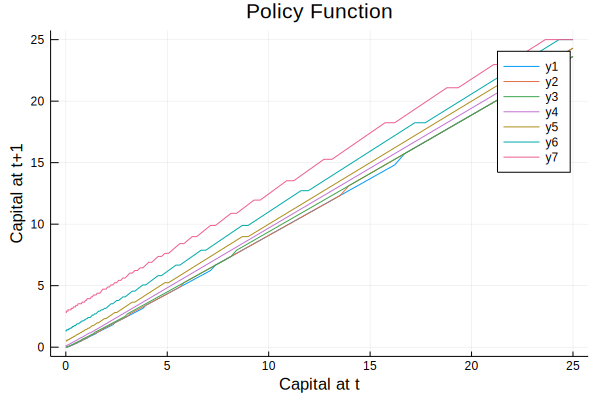

In [9]:
plot(VFI[2],[VFI[1][s,:] for s in 1:N], title ="Policy Function",xlabel="Capital at t", ylabel="Capital at t+1")

#### __3.3.2 Value Function__

Concavity of value function and monotonicity with respect to the productivity shock

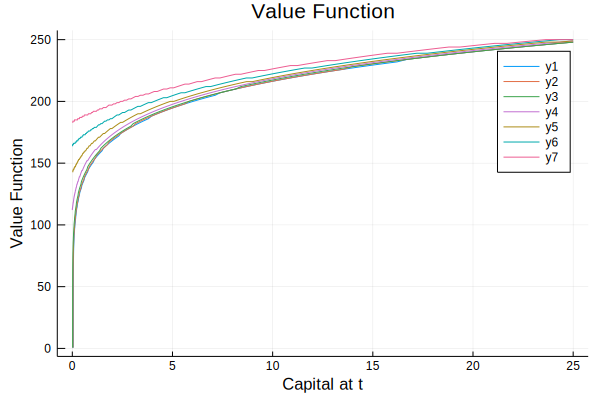

In [10]:
plot(VFI[2],[VFI[3][s,:] for s in 1:N], title ="Value Function",xlabel="Capital at t", ylabel="Value Function")

#### __3.3.3 Non-Uniform grid__

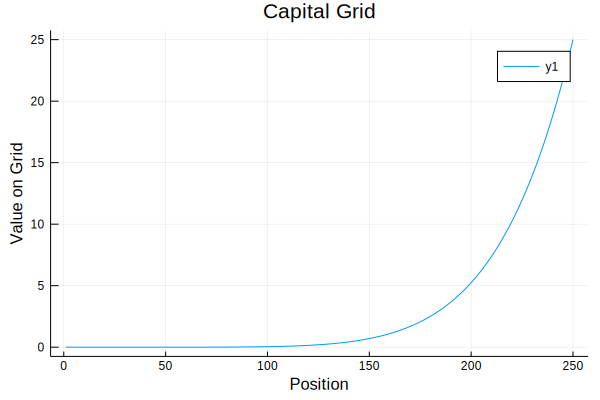

In [11]:
plot(collect(1:1:size(VFI[2])[1]),VFI[2], title ="Capital Grid",xlabel="Position", ylabel="Value on Grid")

### __3.4 Convergence to Stationary Distribution__

Using the results from `KpolicyAiyagari` we follow the following algorithm:

1. Randomly assign an initial combination of state variables $\left\{y_i,a_i\right\}_{i=1}^{pop}$ to each of the pop households. In our simulations we are going to use $pop = 10000$. From this initial assignment we define an initial probability mass function for the state combination $f_0\left(y_i,a_i\right)$.
2. Now we iterate with idiosyncratic shocks at least 100 times until $sup\lvert E_{n+1}\left[a\right]-E_{n}\left[a\right], Var_{n+1}\left[a\right]-Var_{n}\left[a\right], Skw_{n+1}\left[a\right]-Skw_{n}\left[a\right] \lvert< 1E^{-6}$.

In [12]:
function KlevelAiyagari(u, du, k, θ, pop; tol = 1E-6, max_iter = 10000, min_iter = 100)
    start = time()
    println("   Klevel(Aiyagari)...")
    # Extract and define the internal parameters
    β, σ, cc, λ, σϵ, N, a_max, a_grid_size, α, δ = θ[1], θ[2], θ[3], θ[4], θ[5], convert(Int,θ[6]), θ[7], convert(Int,θ[8]), θ[9], θ[10];
    b = -cc;
    # Define the relevant vector of prices
    r = fK(k, 1, α) - δ;
    @assert r < (1-β)/β " r < (1-β)/β not satisfied"
    w = fL(k, 1, α);
    # Extract elements from the KpolicyAiyagari algorithm
    KpolicyAiyagari_sol = KpolicyAiyagari(u, du, k, θ)
    A_prime = KpolicyAiyagari_sol[1];
    a_grid = KpolicyAiyagari_sol[2];
    Ind = KpolicyAiyagari_sol[3];
    V = KpolicyAiyagari_sol[4];
    Y = KpolicyAiyagari_sol[5];
    W = KpolicyAiyagari_sol[6];
    @assert size(Y)[1] == size(W)[1] == size(W)[2] == N;
    # Borrowing constraint as defined in Aiyagari (p. 666)
    φ = r > 0 ? min(b, w*Y[1] / r) : b;
    # Verify if crossing of the policy function with high productivity and the 45 degree line
    @assert minimum(A_prime[N,:] - a_grid) ≤ 0 "No crossing with 45 degree Line"
    # We build the elements conditional in the max level of savings at the steady state. The one that just crosses the 45 degree line
    lim_ind =  a_grid_size;
    a_sup = a_grid[lim_ind];
    new_a_grid = a_grid[1:lim_ind];
    dim_a = size(new_a_grid)[1];
    new_A_prime = A_prime[:,1:lim_ind];
    new_V = V[:, 1:lim_ind];
    new_Ind = Ind[:,1:lim_ind];
    # Initial Condition
    inda0 = fill(convert(Int,max(floor(dim_a/2),1)), pop, 1);
    A0 = new_a_grid[inda0];
    indy0 = rand(Categorical(W[1,:]), pop);
    Y0 = Y[indy0]
    f0 = zeros(size(new_A_prime));
    for j ∈ 1:dim_a
        for s ∈ 1:N
            f0[s, j] = count((Y0 .== Y[s]) .* (A0 .== new_a_grid[j])) * (1/pop)
        end
    end
    @assert sum(f0) ≈ 1 "Initial distribution doesn't add to 1"
    sup = Inf;
    iter = 0;
    f1 = f0;
    A1 = A0;
    Y1 = Y0;
    μ1 = Inf;
    σ1 = Inf;
    sk1 =Inf;
    # Loop for convergence in a finite set of moments
    while (sup > tol && iter <= max_iter)
        A0 = copy(A1);
        A1 = zeros(size(A0));
        Y0 = copy(Y1);
        Y1 = zeros(size(Y0));
        f0 = copy(f1);
        f1 = zeros(size(f0));
        μ0 = copy(μ1);
        σ0 = copy(σ1);
        sk0 = copy(sk1);
        for s ∈ 1:N
            draw = rand(Categorical(W[s,:]), pop)
            for p ∈ 1:N
                Y1 += (draw .== p) .* (Y0 .== Y[s]) * Y[p];
            end
        end
        for j ∈ 1:dim_a
            for s ∈ 1:N
                A1 += (Y0 .== Y[s]) .* (A0 .== new_a_grid[j]) * new_A_prime[s,j];
            end
        end
        for j ∈ 1:dim_a
            for s ∈ 1:N
                f1[s, j] = count((Y0 .== Y[s]) .* (A0 .== new_a_grid[j])) * (1/pop);
            end
        end
        μ1 = mean(A1);
        σ1 = var(A1);
        sk1 = skewness(A1);
        sup = iter>min_iter ? maximum([μ1 - μ0; σ1 - σ0; sk1 - sk0].^2) : Inf;
        f1 = f1 ./ sum(f1);
        iter += 1;
    end
    f = f1;
    Afin = A1;
    KS = μ1;
    Yfin = Y1;
    elapsed = time() - start
    println("      Klevel Aiyagari solved in $iter iterations, with a sup metric of $sup and in $elapsed seconds")
    return sol = [KS, r, f, a_sup, new_a_grid, new_A_prime, new_V, Y, W, Afin, Yfin]
end

KlevelAiyagari (generic function with 1 method)

In [13]:
KS = KlevelAiyagari(u, du, Kr(0.015, δ, α), θ, pop);

   Klevel(Aiyagari)...
   Kpolicy(Aiyagari)...
      Kpolicy Aiyagari solved in 849 iterations, with a sup metric of 9.912071163853398e-11 and in 16.39299988746643 seconds
      Klevel Aiyagari solved in 863 iterations, with a sup metric of 3.985122598923412e-7 and in 154.03199982643127 seconds


#### __3.4.1 Unconditional CDF for asset holdings__

The unconditional distribution for asset holdings is:

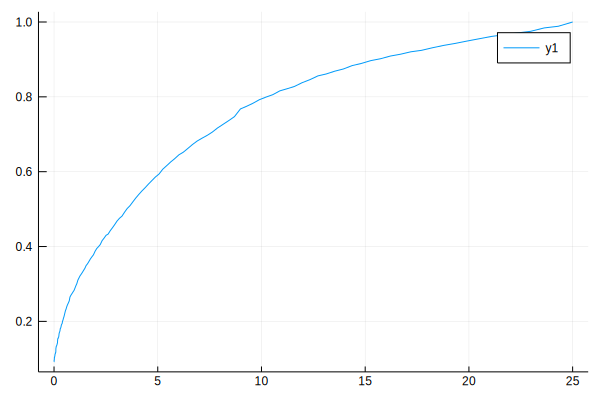

In [14]:
plot(KS[5], [sum(KS[3][:,1:s]) for s in 1: size(KS[5])[1]])

In [15]:
a = sum(KS[3][:,1]) * 100
println("The probability mass function show us that $a% of the households are hand-to-mouth consumers at the borrowing constraint")

The probability mass function show us that 9.23% of the households are hand-to-mouth consumers at the borrowing constraint


#### __3.4.2 Unconditional PDF for asset holdings__

The density function for asset holdings is given by

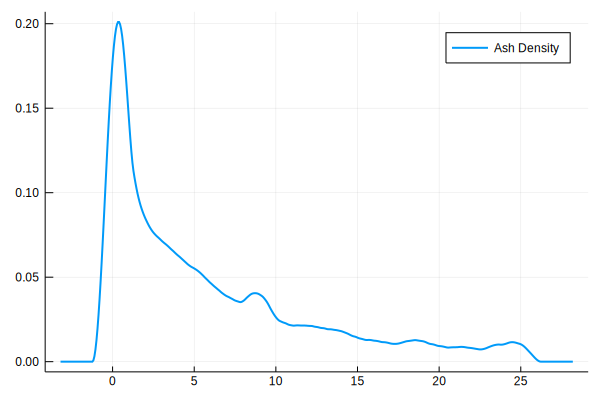

In [16]:
plot(ash(vec(KS[10]); m =20); hist = false)

#### __3.4.3 Conditional CDF for asset holdings__

The conditional distribution for asset holdings given idiosyncratic productivity is:

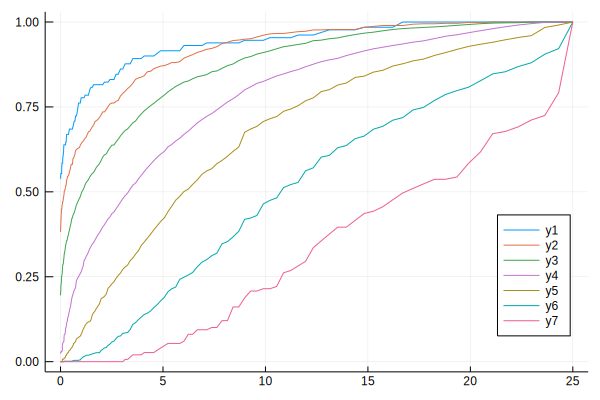

In [17]:
plot(KS[5],[sum(KS[3][p,1:s])/sum(KS[3][p,:]) for s in 1:size(KS[5])[1], p in 1:size(KS[8])[1]], legend=:bottomright)

We can see that as the idiosyncratic productivity shock increases the probability of being a hand-to-mouth consumer diminishes.  

#### __3.4.4 Conditional PDF for asset holdings__

The conditional PDF for asset holdings are

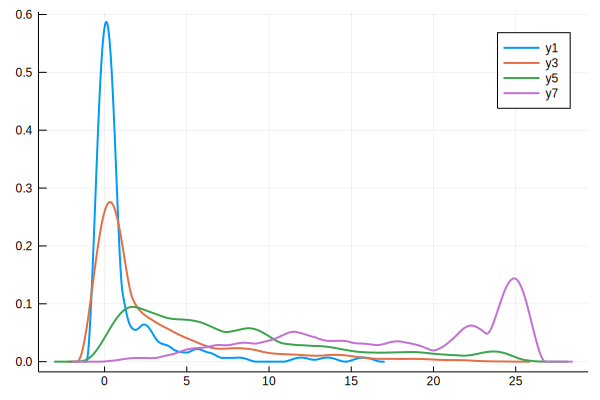

In [18]:
plot(ash(vec(KS[10][KS[11] .== KS[8][1]]); m=30),  label = "y1" ; hist = false)
plot!(ash(vec(KS[10][KS[11] .== KS[8][3]]); m=30),  label = "y3"  ; hist = false)
plot!(ash(vec(KS[10][KS[11] .== KS[8][5]]); m=30),  label = "y5"  ; hist = false)
plot!(ash(vec(KS[10][KS[11] .== KS[8][7]]); m=30),  label = "y7"  ; hist = false)

Again, as productivity increases the probability of being a hand-to-mouth consumer decreases

#### __3.4.5 Supply and Demand in Bewley models__

Let's look at the behaviour of the demand and supply function under $\sigma =5$, $\lambda = 0.6$, and $\sigma_\epsilon=0.2$

   Klevel(Aiyagari)...
   Kpolicy(Aiyagari)...
      Kpolicy Aiyagari solved in 525 iterations, with a sup metric of 9.838174719334347e-11 and in 28.5 seconds
      Klevel Aiyagari solved in 1043 iterations, with a sup metric of 7.789821441754257e-7 and in 192.4100000858307 seconds
(r, r_range[r], Supply1[r], Demand1[r]) = (1, 0.0, 2.208041498118361, 10.48683784717663)
   Klevel(Aiyagari)...
   Kpolicy(Aiyagari)...
      Kpolicy Aiyagari solved in 536 iterations, with a sup metric of 9.906653275493227e-11 and in 29.7810001373291 seconds
      Klevel Aiyagari solved in 573 iterations, with a sup metric of 1.695323149304264e-7 and in 119.64400005340576 seconds
(r, r_range[r], Supply1[r], Demand1[r]) = (2, 0.0008620689655172414, 2.333170515892558, 10.312674983554945)
   Klevel(Aiyagari)...
   Kpolicy(Aiyagari)...
      Kpolicy Aiyagari solved in 548 iterations, with a sup metric of 9.773781783906088e-11 and in 33.47200012207031 seconds
      Klevel Aiyagari solved in 953 iterations, with 

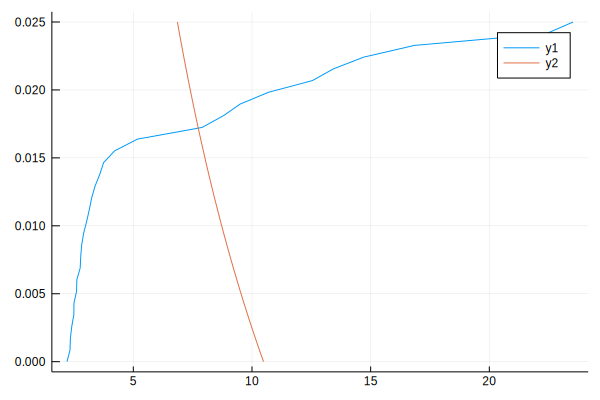

In [19]:
θ[5] = 0.2
θ[2] = 5.0
θ[4] = 0.6

r_range = collect(range(-0.0, 0.025, length=30));
Supply1 = fill(0.0, size(r_range)[1], 1);
Demand1 = fill(0.0, size(r_range)[1], 1);

for r ∈ 1 : size(r_range)[1]
    Supply1[r] = KlevelAiyagari(u, du, Kr(r_range[r], θ[10], θ[9]), θ, pop)[1];
    Demand1[r] = Kr(r_range[r], θ[10], θ[9]);
    @show r, r_range[r], Supply1[r], Demand1[r]
end

plot([Supply1 Demand1], r_range)

### __3.5 Convergence to Equilibrium__

__Steps for Convergence to Equilibrium__

1. We start with an interest rate $r_1=\frac{1-\beta}{\beta}-\epsilon$ and find the demand for capital $K(r_1)$.
2. We evaluate $KlevelAiyagari(u, du, Kr(r_1, δ, α), θ, pop)$ and obtain the supply of capital $A(r_1)$, with this we establish the interest rate $r_2=Min\left\{f_K\left(A(r_1),1,\alpha\right)-\delta, \frac{1-\beta}{\beta}\right\}$. By definition $r_1$ and $r_2$ are at opposite sides of the equilibrium. Without loss of generality less assume $r_1>r_2$.
3. We define $r =\frac{r_1+r_2}{2}$ and run $KlevelAiyagari(u, du, Kr(r_1, δ, α), θ, pop)$ in order to find $A(r)$. If $A(r)> K(r)$ we replace $r_1 =r$, if $A(r) < K(r)$ we replace $r_2 =r$.
4. If $\lvert A(r) - K(r)\lvert<0.01$ or if $\lvert r_1 -r_2 \lvert < 1E^{-4}$ we declare $(A(r), r)$ as the equilibrium. Otherwise repeat 3. 

In [20]:
function EquilibriumAiyagari(u, du, θ; tol = 0.01, max_iter = 100)
    start = time()
    println("  ")
    println("  ")
    println("   Equilibrium(Aiyagari)...")
    # Extract and define the internal parameters
    β, σ, cc, λ, σϵ, N, a_max, a_grid_size, α, δ = θ[1], θ[2], θ[3], θ[4], θ[5], convert(Int,θ[6]), θ[7], convert(Int,θ[8]), θ[9], θ[10];
    b = -cc;
    # Initial interest condition
    r1 = (1-β)/β - eps();
    K1 = Kr(r1, δ, α);
    w1 = fL(K1, 1, α);
    @assert fK(K1, 1, α) - δ ≈ r1 "Equality in implied interest rates"
    K_path = [K1];
    r_path = [r1];
    w_path = [w1];
    iter  = 0;
    println("In iteration $iter we have (K0, r0, w0) = ($K1, $r1, $w1).")
    # Extract elements from the KlevelAiyagari algorithm
    K2 = KlevelAiyagari(u, du, Kr(r1, θ[10], θ[9]), θ, pop)[1];
    r2 = min(fK(K2, 1, α) - δ, (1-β)/β);
    w2 = fL(K2, 1, α);
    K_path = [K_path; K2];
    r_path = [r_path; r2];
    w_path = [w_path; w2];
    iter += 1;
    r = r1;
    K = K2;
    w = w2;
    sup = Inf;
    println("In iteration $iter we have (K, r1, r2, w, sup) = ($K, $r1, $r2, $w, $sup).")
    while (isnan(K) == 1) | (sup > tol && iter ≤ max_iter)
        iter += 1;
        r = (r1 + r2) /2;
        KlevelAiyagari_sol  = KlevelAiyagari(u, du, Kr(r, θ[10], θ[9]), θ, pop);
        K = KlevelAiyagari_sol[1];
        if isnan(K) == 1
            K = 0.0
        end
        if  K > Kr(r, δ, α)
            if r1 < r2
                r2 = r;
            elseif r1 > r2
                r1 = r
            end
        elseif K < Kr(r, δ, α)
            if r1 < r2
                r1 = r;
            elseif r1 > r2
                r2 = r
            end
        end
        w = fL(K, 1, α);
        sup = abs(Kr(r, δ, α) - K);
        K_path = [K_path; K];
        r_path = [r_path; r];
        w_path = [w_path; w];
        println("In iteration $iter we have (K, r1, r2, w, sup) = ($K, $r1, $r2, $w, $sup).")
        if (sup ≤ tol) | (abs(r1-r2) < 1E-4)
            f = KlevelAiyagari_sol[3];
            a_sup = KlevelAiyagari_sol[4];
            a_grid = KlevelAiyagari_sol[5];
            A_prime = KlevelAiyagari_sol[6];
            V = KlevelAiyagari_sol[7];
            Y = KlevelAiyagari_sol[8];
            W = KlevelAiyagari_sol[9];
            Afin = KlevelAiyagari_sol[10];
            Yfin = KlevelAiyagari_sol[11];
            break
        end
    end
    K_path = K_path
    r_path = r_path
    w_path = w_path
    K_end = K_path[iter+1];
    r_end = r_path[iter+1];
    w_end = w_path[iter+1];
    f = f;
    a_sup = a_sup;
    a_grid = a_grid;
    A_prime = A_prime;
    Afin = Afin;
    Yfin = Yfin;
    V = V;
    Y = Y;
    W = W;
    savings = δ*α  / (r + δ);
    elapsed = time() - start
    println("Equilibrium found in $elapsed seconds")
    return sol = K_end, r_end, w_end, savings, f, a_sup, a_grid, A_prime, V, Y, K, K_path, r_path, w_path, Afin, Yfin
end

EquilibriumAiyagari (generic function with 1 method)

To have an idea about the way in which this algorithm solves this problem let's run non silently one time

In [25]:
θ[5] = 0.4;
θ[2] = 3.0;
θ[4] = 0.6;
E = EquilibriumAiyagari(u, du, θ)

  
  
   Equilibrium(Aiyagari)...
In iteration 0 we have (K0, r0, w0) = (5.446807380113248, 0.041666666666666484, 1.1781242629578268).
   Klevel(Aiyagari)...
   Kpolicy(Aiyagari)...
      Kpolicy Aiyagari solved in 10001 iterations, with a sup metric of 0.39433607637101886 and in 629.8780000209808 seconds
      Klevel Aiyagari solved in 636 iterations, with a sup metric of 2.907807884373856e-7 and in 758.6510000228882 seconds
In iteration 1 we have (K, r1, r2, w, sup) = (24.080694329923823, 0.041666666666666484, -0.03300687376558956, 2.0117815261481993, Inf).
   Klevel(Aiyagari)...
   Kpolicy(Aiyagari)...
      Kpolicy Aiyagari solved in 596 iterations, with a sup metric of 9.885958718314214e-11 and in 38.878000020980835 seconds
      Klevel Aiyagari solved in 942 iterations, with a sup metric of 3.322094215339875e-7 and in 224.04699993133545 seconds
In iteration 2 we have (K, r1, r2, w, sup) = (5.60958020920355, 0.041666666666666484, 0.0043298964505384605, 1.1906795766627767, 4.048180

(8.295533162450775, 0.013299472107928591, 1.37076789237227, 0.30868341855872705, [0.00010000000000000002 0.0 … 0.0 0.0; 0.0004000000000000001 0.0 … 0.0 0.00010000000000000002; … ; 0.0 0.0 … 0.0005000000000000001 0.0009000000000000002; 0.0 0.0 … 0.00010000000000000002 0.0005000000000000001], 25.0, [4.0960000000000004e-16, 5.2428800000000005e-14, 8.957952000000001e-13, 6.710886400000001e-12, 3.2000000000000006e-11, 1.1466178560000002e-10, 3.373232128e-10, 8.589934592000001e-10, 1.959104102399999e-9, 4.096000000000001e-9  …  19.3410142982354, 19.90982807496902, 20.492920872550275, 21.090590156950757, 21.703138331168, 22.3308727964269, 22.97410601388485, 23.633155566842625, 24.308344223463116, 25.0], [4.0960000000000004e-16 4.0960000000000004e-16 … 22.97410601388485 23.633155566842625; 4.0960000000000004e-16 4.0960000000000004e-16 … 22.97410601388485 23.633155566842625; … ; 2.2293220545737324 2.2293220545737324 … 25.0 25.0; 4.391392213728001 4.391392213728001 … 25.0 25.0], [-0.746773222955

We can see the way in which the algorithm converges to the equilibrium valu of $K$ and $r$

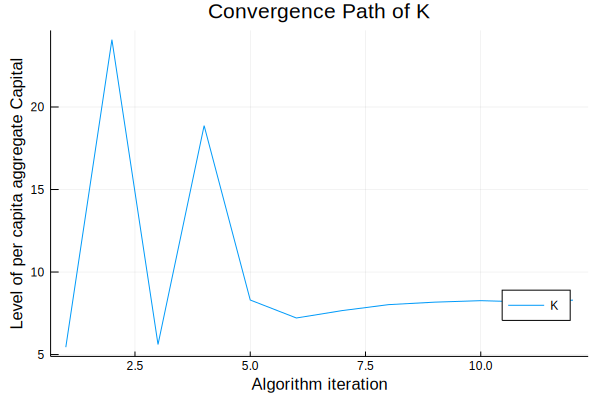

In [26]:
plot(1:size(E[12])[1], E[12], title ="Convergence Path of K",xlabel="Algorithm iteration", ylabel="Level of per capita aggregate Capital", legend=:bottomright, label="K")

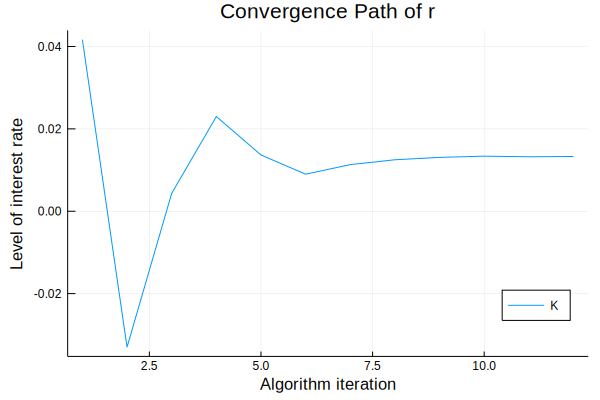

In [27]:
plot(1:size(E[13])[1], E[13], title ="Convergence Path of r",xlabel="Algorithm iteration", ylabel="Level of interest rate", legend=:bottomright, label="K")

Now we estimate the final results in table A and B of Aiyagari and compare our results with his estimations (the following line of commands takes around one day to run):

In [22]:
#TABLE A
θ[5] = 0.2;
# Column 1
θ[2] = 1.0;
θ[4] = 0.0;
AE11 = EquilibriumAiyagari(u, du, θ);
θ[4] = 0.3;
AE21 = EquilibriumAiyagari(u, du, θ);
θ[4] = 0.6;
AE31 = EquilibriumAiyagari(u, du, θ);
θ[4] = 0.9;
AE41 = EquilibriumAiyagari(u, du, θ);
# Column 2
θ[2] = 3.0;
θ[4] = 0.0;
AE12 = EquilibriumAiyagari(u, du, θ);
θ[4] = 0.3;
AE22 = EquilibriumAiyagari(u, du, θ);
θ[4] = 0.6;
AE32 = EquilibriumAiyagari(u, du, θ);
θ[4] = 0.9;
AE42 = EquilibriumAiyagari(u, du, θ);
# Column 3
θ[2] = 5.0;
θ[4] = 0.0;
AE13 = EquilibriumAiyagari(u, du, θ);
θ[4] = 0.3;
AE23 = EquilibriumAiyagari(u, du, θ);
θ[4] = 0.6;
AE33 = EquilibriumAiyagari(u, du, θ);
θ[4] = 0.9;
AE43 = EquilibriumAiyagari(u, du, θ);
#TABLE B
θ[5] = 0.4;
# Column 1
θ[2] = 1.0;
θ[4] = 0.0;
BE11 = EquilibriumAiyagari(u, du, θ);
θ[4] = 0.3;
BE21 = EquilibriumAiyagari(u, du, θ);
θ[4] = 0.6;
BE31 = EquilibriumAiyagari(u, du, θ);
θ[4] = 0.9;
BE41 = EquilibriumAiyagari(u, du, θ);
# Column 2
θ[2] = 3.0;
θ[4] = 0.0;
BE12 = EquilibriumAiyagari(u, du, θ);
θ[4] = 0.3;
BE22 = EquilibriumAiyagari(u, du, θ);
θ[4] = 0.6;
BE32 = EquilibriumAiyagari(u, du, θ);
θ[4] = 0.9;
BE42 = EquilibriumAiyagari(u, du, θ);
# Column 3
θ[2] = 5.0;
θ[4] = 0.0;
BE13 = EquilibriumAiyagari(u, du, θ);
θ[4] = 0.3;
BE23 = EquilibriumAiyagari(u, du, θ);
θ[4] = 0.6;
BE33 = EquilibriumAiyagari(u, du, θ);
θ[4] = 0.9;
BE43 = EquilibriumAiyagari(u, du, θ);

  
  
   Equilibrium(Aiyagari)...
In iteration 0 we have (K0, r0, w0) = (5.446807380113248, 0.041666666666666484, 1.1781242629578268).
   Klevel(Aiyagari)...
   Kpolicy(Aiyagari)...
      Kpolicy Aiyagari solved in 10001 iterations, with a sup metric of 0.8027649081013806 and in 160.04999995231628 seconds
      Klevel Aiyagari solved in 102 iterations, with a sup metric of NaN and in 175.74899983406067 seconds
In iteration 1 we have (K, r1, r2, w, sup) = (25.0, 0.041666666666666484, -0.034120265586010584, 2.0390993072884185, Inf).
   Klevel(Aiyagari)...
   Kpolicy(Aiyagari)...
      Kpolicy Aiyagari solved in 597 iterations, with a sup metric of 9.832135106080386e-11 and in 9.809000015258789 seconds
      Klevel Aiyagari solved in 533 iterations, with a sup metric of 9.401574527009033e-7 and in 96.45100021362305 seconds
In iteration 2 we have (K, r1, r2, w, sup) = (0.2414743994162356, 0.041666666666666484, 0.00377320054032795, 0.3837192332898275, 9.516752818858862).
   Klevel(Aiyagari)

In [43]:
TABLEA = [(AE11[4],AE11[2],AE11[1]) (AE12[4],AE12[2],AE12[1]) (AE13[4],AE13[2],AE13[1]); (AE21[4],AE21[2],AE21[1]) (AE22[4],AE22[2],AE22[1]) (AE23[4],AE23[2],AE23[1]); (AE31[4],AE31[2],AE31[1]) (AE32[4],AE32[2],AE32[1]) (AE33[4],AE33[2],AE33[1]); (AE41[4],AE41[2],AE41[1]) (AE42[4],AE42[2],AE42[1]) (AE43[4],AE43[2],AE43[1])];
TABLEB = [(BE11[4],BE11[2],BE11[1]) (BE12[4],BE12[2],BE12[1]) (BE13[4],BE13[2],BE13[1]); (BE21[4],BE21[2],BE21[1]) (BE22[4],BE22[2],BE22[1]) (BE23[4],BE23[2],BE23[1]); (BE31[4],BE31[2],BE31[1]) (BE32[4],BE32[2],BE32[1]) (BE33[4],BE33[2],BE33[1]); (BE41[4],BE41[2],BE41[1]) (BE42[4],BE42[2],BE42[1]) (BE43[4],BE43[2],BE43[1])];

In the following graphs we see the values from our estimation for Table II.A and II.B of Aiyagari in the following order: savings, interest rate, capital

- As the persistency in the shock increases (an increase in $\lambda$) there is a higher level of savings in the economy, a higher level of capital and a lower interest rate.
- As the risk aversion coefficient $\mu$ increases we have more savings, a higher level of capital and lower interest rates.
- As the variance of income shock increases there is an increase in the level of savings, the stationary level of capital, and a reduction in the level of interest rates.

In [45]:
@show TABLEA[:,1]

TABLEA[:, 1] = Tuple{Float64,Float64,Float64}[(0.28635738531582133, 0.02057362399868507, 7.781328567534022), (0.28677945903236973, 0.020425602646629064, 6.504934850431803), (0.2876273501704559, 0.020129559942517042, 7.123473249835518), (0.2950417724383304, 0.017613296456249324, 7.487291804160057)]
TABLEA[:, 2] = Tuple{Float64,Float64,Float64}[(0.28634418282331964, 0.020578261154235507, 8.388679608415359), (0.28760605383027227, 0.020136974227239396, 6.9737677252374475), (0.29147367336190255, 0.018808237697135154, 7.3050439106855745), (0.3278510224839727, 0.007844777124060714, 9.01764311370713)]
TABLEA[:, 3] = Tuple{Float64,Float64,Float64}[(0.2867207943031512, 0.020446150304500164, 7.261558854805246), (0.2888853304559496, 0.019693535682634947, 7.31831417229061), (0.2958869803749272, 0.017334461839134188, 7.782617629469243), (0.37311801548154866, -0.0028126254830377903, 10.947757836550716)]


4-element Array{Tuple{Float64,Float64,Float64},1}:
 (0.2867207943031512, 0.020446150304500164, 7.261558854805246)    
 (0.2888853304559496, 0.019693535682634947, 7.31831417229061)     
 (0.2958869803749272, 0.017334461839134188, 7.782617629469243)    
 (0.37311801548154866, -0.0028126254830377903, 10.947757836550716)

In [46]:
@show TABLEA[:,2]

TABLEA[:, 2] = Tuple{Float64,Float64,Float64}[(0.28634418282331964, 0.020578261154235507, 8.388679608415359), (0.28760605383027227, 0.020136974227239396, 6.9737677252374475), (0.29147367336190255, 0.018808237697135154, 7.3050439106855745), (0.3278510224839727, 0.007844777124060714, 9.01764311370713)]


4-element Array{Tuple{Float64,Float64,Float64},1}:
 (0.28634418282331964, 0.020578261154235507, 8.388679608415359) 
 (0.28760605383027227, 0.020136974227239396, 6.9737677252374475)
 (0.29147367336190255, 0.018808237697135154, 7.3050439106855745)
 (0.3278510224839727, 0.007844777124060714, 9.01764311370713)   

In [47]:
@show TABLEA[:,3]

TABLEA[:, 3] = Tuple{Float64,Float64,Float64}[(0.2867207943031512, 0.020446150304500164, 7.261558854805246), (0.2888853304559496, 0.019693535682634947, 7.31831417229061), (0.2958869803749272, 0.017334461839134188, 7.782617629469243), (0.37311801548154866, -0.0028126254830377903, 10.947757836550716)]


4-element Array{Tuple{Float64,Float64,Float64},1}:
 (0.2867207943031512, 0.020446150304500164, 7.261558854805246)    
 (0.2888853304559496, 0.019693535682634947, 7.31831417229061)     
 (0.2958869803749272, 0.017334461839134188, 7.782617629469243)    
 (0.37311801548154866, -0.0028126254830377903, 10.947757836550716)

In [48]:
@show TABLEB[:,1]

TABLEB[:, 1] = Tuple{Float64,Float64,Float64}[(0.286782362050663, 0.020424586066113058, 7.314869959386822), (0.28699553733061844, 0.020349992434977975, 8.982858261616679), (0.29086351447286407, 0.019015512661306577, 7.564773259064907), (0.3221531704180087, 0.009398468320614878, 8.80830852430827)]


4-element Array{Tuple{Float64,Float64,Float64},1}:
 (0.286782362050663, 0.020424586066113058, 7.314869959386822)  
 (0.28699553733061844, 0.020349992434977975, 8.982858261616679)
 (0.29086351447286407, 0.019015512661306577, 7.564773259064907)
 (0.3221531704180087, 0.009398468320614878, 8.80830852430827)  

In [49]:
@show TABLEB[:,2]

TABLEB[:, 2] = Tuple{Float64,Float64,Float64}[(0.2881610929106033, 0.01994409623139051, 8.182377022951979), (0.2901105997290026, 0.019272484448698474, 7.850419364071882), (0.3084643066592186, 0.013365745657624207, 8.247113478894166), (0.42907713662416536, -0.012879201565973164, 13.742291171769967)]


4-element Array{Tuple{Float64,Float64,Float64},1}:
 (0.2881610929106033, 0.01994409623139051, 8.182377022951979)    
 (0.2901105997290026, 0.019272484448698474, 7.850419364071882)   
 (0.3084643066592186, 0.013365745657624207, 8.247113478894166)   
 (0.42907713662416536, -0.012879201565973164, 13.742291171769967)

In [50]:
@show TABLEB[:,3]

TABLEB[:, 3] = Tuple{Float64,Float64,Float64}[(0.2908474041422361, 0.019020997230271446, 6.283985728337159), (0.2949961736821567, 0.017628384939767136, 7.321187650760802), (0.33250947874543824, 0.006614072202280373, 9.312470320658493), (0.4870818006359508, -0.020872354576997695, 16.67688170907274)]


4-element Array{Tuple{Float64,Float64,Float64},1}:
 (0.2908474041422361, 0.019020997230271446, 6.283985728337159) 
 (0.2949961736821567, 0.017628384939767136, 7.321187650760802) 
 (0.33250947874543824, 0.006614072202280373, 9.312470320658493)
 (0.4870818006359508, -0.020872354576997695, 16.67688170907274)

The values do not match properly Aiyagari's estimation. 

As the risk aversion parameter $\sigma$ increases see that there is a lowe concentration of agents at the borrowing constraint. Agents accumulate more assets. 

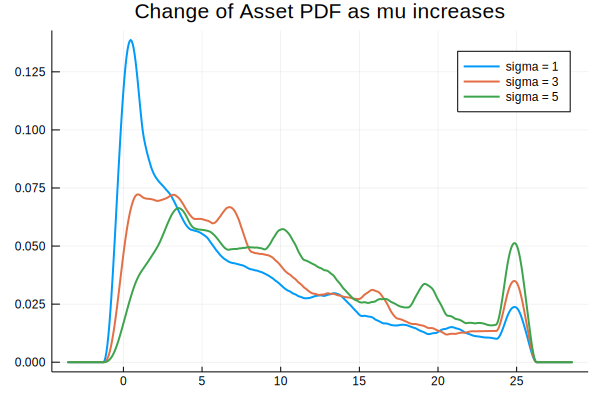

In [77]:
plot(ash(vec(AE41[15]); m =20); hist = false, label="sigma = 1", title = "Change of Asset PDF as sigma increases")
plot!(ash(vec(AE42[15]); m =20); hist = false, label="sigma = 3")
plot!(ash(vec(AE43[15]); m =20); hist = false, label="sigma = 5")

This is also reflected in the CDF

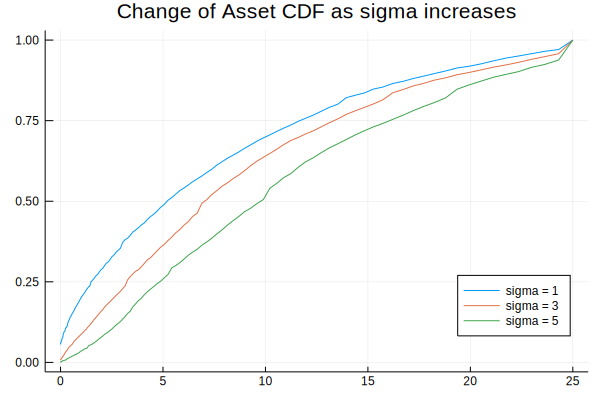

In [82]:
plot(AE41[7], [sum(AE41[5][:,1:s]) for s in 1: size(AE41[7])[1]], legend=:bottomright, label="sigma = 1", title = "Change of Asset CDF as sigma increases")
plot!(AE42[7], [sum(AE42[5][:,1:s]) for s in 1: size(AE42[7])[1]], label="sigma = 3")
plot!(AE43[7], [sum(AE43[5][:,1:s]) for s in 1: size(AE43[7])[1]], label="sigma = 5")

As the persistency of the shock increases there is going to be a higher concentration of agents at the level of the borrowing constraint and a higher number of agents with high levels of welath

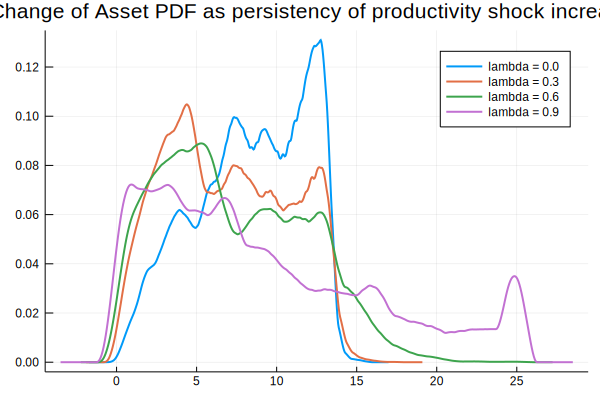

In [70]:
plot(ash(vec(AE12[15]); m =20); hist = false, label="lambda = 0.0", title = "Change of Asset PDF as persistency of productivity shock increases")
plot!(ash(vec(AE22[15]); m =20); hist = false, label="lambda = 0.3",)
plot!(ash(vec(AE32[15]); m =20); hist = false, label="lambda = 0.6",)
plot!(ash(vec(AE42[15]); m =20); hist = false, label="lambda = 0.9",)

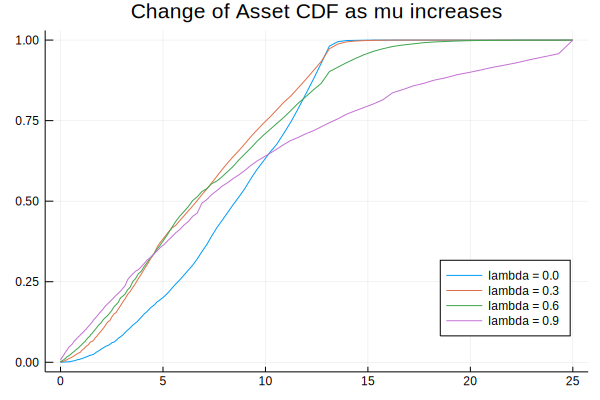

In [69]:
plot(AE12[7], [sum(AE12[5][:,1:s]) for s in 1: size(AE12[7])[1]], legend=:bottomright, label="lambda = 0.0", title = "Change of Asset CDF as mu increases")
plot!(AE22[7], [sum(AE22[5][:,1:s]) for s in 1: size(AE22[7])[1]], label="lambda = 0.3")
plot!(AE32[7], [sum(AE32[5][:,1:s]) for s in 1: size(AE32[7])[1]], label="lambda = 0.6")
plot!(AE42[7], [sum(AE42[5][:,1:s]) for s in 1: size(AE42[7])[1]], label="lambda = 0.9")

As the variance of the income shock increases we have that the number of agents with high levels of wealth is going to increase

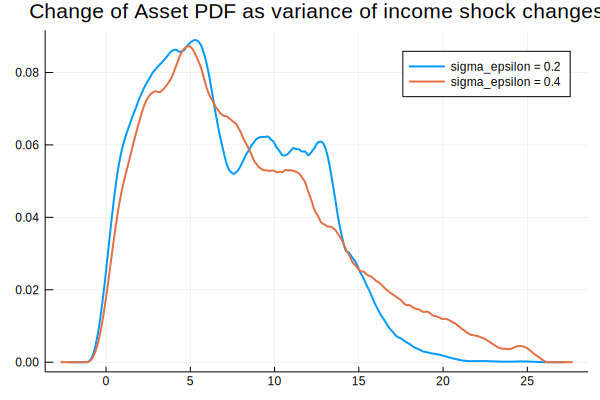

In [85]:
plot(ash(vec(AE32[15]); m =20); hist = false, label="sigma_epsilon = 0.2", title = "Change of Asset PDF as variance of income shock changes")
plot!(ash(vec(BE32[15]); m =20); hist = false, label="sigma_epsilon = 0.4",)

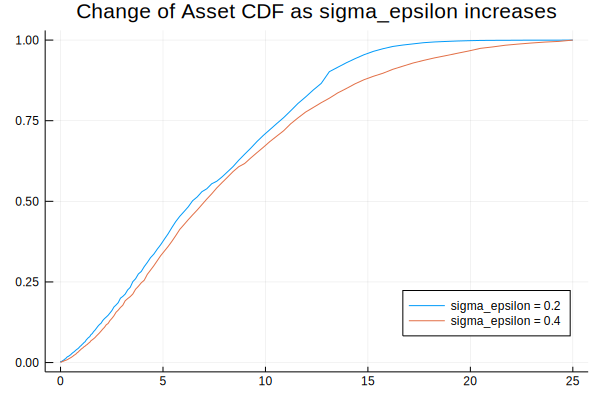

In [74]:
plot(AE32[7], [sum(AE32[5][:,1:s]) for s in 1: size(AE32[7])[1]], legend=:bottomright, label="sigma_epsilon = 0.2", title = "Change of Asset CDF as sigma_epsilon increases")
plot!(BE32[7], [sum(BE32[5][:,1:s]) for s in 1: size(BE32[7])[1]], label="sigma_epsilon = 0.4")